## Math 693A: Homework 3

Stephen Giang

RedID: 823184070

Due: 11-06-24


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Problem 1

Implement the standard CG algorithm, and use it to solve linear systems in which A is the Hilbert matrix, whose elements are $a_{ij} = 1 / (i + j - 1)$. Set the right-hand-side to be all ones $\vec{b}$ = ones(n,1), and the initial point to be the origin $\vec{x_0}$ = zeros(n,1). In the stopping criteria, use $|| r_k || > 10^{-6}$.

-   For dimensions $n = 5, 8, 12, 20$, plot the log of the norm of the residual (i.e., $\log_{10}(||r_k|)$) against the iteration (on the same figure); stop when the norm is less than $10^{-6}$.
-   Present in a table, the number of iterations for $n = 5, 8, 12, 20$.
-   Compute the condition number for the Hilbert matrices, present in a table the log of the condition number for the Hilbert matrix for $n = 5, 8, 12, 20$. Use log to base 10.

Note: The Hilbert matrix shows up in the normal equations in least squares approximations and is an example of a matrix with a nasty condition number. Note that the Hilbert matrix is a square matrix, therefore a matrix size $n$ denotes an $n \times n$ matrix.

-   Plot the eigenvalues for $n = 5, 8, 12, 20$ on the same figure in order to show the spread of the eigenvalues. The log of the eigenvalues should be on the y-axis (use log to base 10). For each $n$, label/order the eigenvalues of the matrix from 1 to $n$, beginning from the lowest to highest eigenvalue. The eigenvalue label should be on the x-axis.
-   Plot the convergence factors against $n$ for the Conjugate Gradient and Steepest Descent for $n = 2, 3, 4, \cdots , 20$. Using the graph, discuss the performance of both methods.


In [2]:
def Hilbert(n):
    A = []
    for i in range(1, n + 1):
        row = []
        for j in range(1, n + 1):
            row.append(1 / (i + j - 1))
        A.append(row)
    return np.array(A)

In [3]:
def Conjugate_Gradient_Standard(A, b, x0, stop_criteria):
    r0 = np.matmul(A, x0) - b
    p0 = -r0
    rk = r0
    pk = p0
    xk = x0
    rk_vals = [np.linalg.norm(rk)]
    while np.linalg.norm(rk) > stop_criteria:
        Apk = np.matmul(A, pk)
        rkTrk = np.matmul(np.transpose(rk), rk)
        ak = rkTrk / np.matmul(np.transpose(pk), Apk)
        xk += ak * pk
        rk += ak * Apk
        bk = np.matmul(np.transpose(rk), rk) / rkTrk
        pk = -rk + bk*pk
        rk_vals.append(np.linalg.norm(rk))

    return xk, rk_vals

,n,iterations,log_10(cond(A))
0,5,7,5.678161
1,8,20,10.183486
2,12,38,16.209827
3,20,73,18.323568


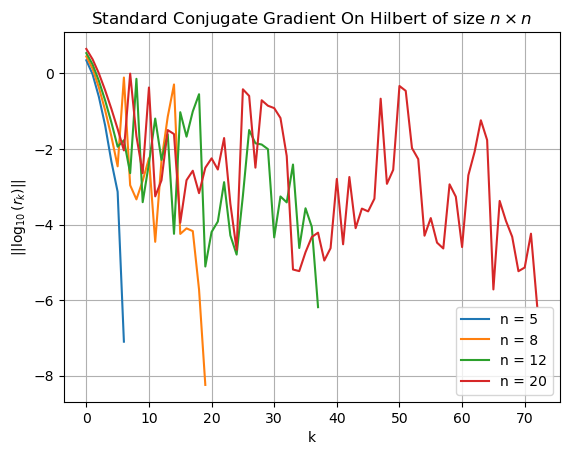

In [4]:
def getInfoCGHilbert(N):
    plt.grid()
    iterations = []
    condA = []
    for n in N:
        A = Hilbert(n)
        b = np.ones(n)
        x0 = np.zeros(n)
        stop_criteria = 1e-6
        xk, rk_vals = Conjugate_Gradient_Standard(A, b, x0, stop_criteria)

        plt.xlabel('k')
        plt.ylabel('$||\\log_{10}(r_k)||$')
        plt.title("Standard Conjugate Gradient On Hilbert of size $n \\times n$")
        plt.plot(range(len(rk_vals)), np.log10(rk_vals))

        iterations.append(len(rk_vals))
        condA.append(np.log10(np.linalg.cond(A)))

    plt.legend(['n = ' + str(n) for n in N], loc='best')
    info = {'n': N, 'iterations': iterations, 'log_10(cond(A))': condA}
    return pd.DataFrame(data=info)

N = [5, 8, 12, 20]
getInfoCGHilbert(N)

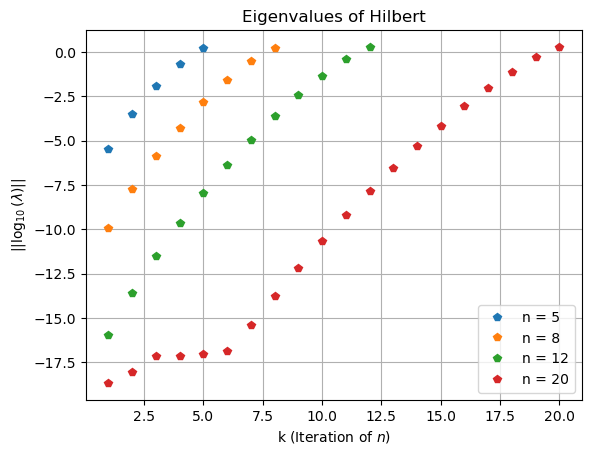

In [6]:
def plot_eigs(N):
    plt.grid()
    for n in N:
        A = Hilbert(n)
        eig_vals = np.abs(np.linalg.eig(A)[0])
        eig_vals.sort()
        K_A_vals = [eig_val / eig_vals[0] for eig_val in eig_vals]

        plt.xlabel('k (Iteration of $n$)')
        plt.ylabel('$||\\log_{10}(\\lambda)||$')
        plt.title('Eigenvalues of Hilbert')

        plt.plot(range(1, n + 1), np.log10(eig_vals), 'p')

    plt.legend(['n = ' + str(n) for n in N], loc='best')

    return K_A_vals

K_A_vals = plot_eigs(N)

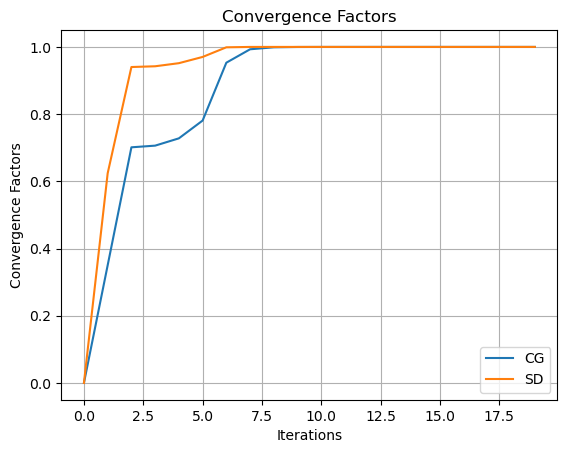

In [8]:
def plot_K_A_vals(K_A_vals):
    sqrt_K_A_vals = np.sqrt(K_A_vals)
    CG = [(sqrt_K_A_val - 1) / (sqrt_K_A_val + 1) for sqrt_K_A_val in sqrt_K_A_vals]
    SD = [(K_A_val - 1) / (K_A_val + 1) for K_A_val in K_A_vals]
    plt.grid()
    plt.plot(CG)
    plt.plot(SD)
    plt.xlabel('Iterations')
    plt.ylabel('Convergence Factors')
    plt.title('Convergence Factors')
    plt.legend(['CG', 'SD'])

plot_K_A_vals(K_A_vals)

### Problem 2

Construct matrices with different eigenvalue distributions (clustered and non-clustered) and apply the Conjugate
Gradient (CG) method to them.

-   Describe how you generated your matrices.
-   Comment on whether the behavior of the CG method can be explained from Theorem 5.5 in the text by Nocedal and Wright 2006. Generate a figure similar to Figure 5.4 in the text by Nocedal and Wright 2006.


To construct Matrices with different eigenvalue distributions, I made a diagonal matrix with different values that were a specific distance apart.


In [106]:
n_vals  = [5, 8, 12, 20]
n_col = []
eig_diffs = [1e-5, 1e-2, 1e0, 1e1, 1e2, 1e5]
eig_diff_col = []
num_iters = []
for n in n_vals:
    for eig_diff in eig_diffs:
        eig_vals = [(random.random() * 2 * eig_diff) - eig_diff for _ in range(n)]
        A = np.diag(eig_vals)
        b = np.ones(n)
        x0 = np.zeros(n)
        stop_criteria = 1e-6
        xk, rk_vals = Conjugate_Gradient_Standard(A, b, x0, stop_criteria)
        n_col.append(n)
        eig_diff_col.append(eig_diff)
        num_iters.append(len(rk_vals))
data = {'n': n_col, 'eig_diff': eig_diff_col, 'iterations': num_iters}
pd.DataFrame(data=data)

,n,eig_diff,iterations
0,5,0.00001,6
1,5,0.01000,6
2,5,1.00000,6
3,5,10.00000,6
4,5,100.00000,6
5,5,100000.00000,6
6,8,0.00001,9
7,8,0.01000,9
8,8,1.00000,9
9,8,10.00000,9


### Problem 3

Program that Line Search Newton-CG Method (see Lecture 13) and use it to minimize the function
$$ f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Use a sequence {$\eta_k$} that guarantees super-linear convergence. Use $||\nabla f(x_k)||< 10^{-8}$ as the stopping criteria for your outer optimization algorithm. Use the backtracking line search to find the step length $\alpha_k^{LS}$. Use the initial point: $x_0 = [−1.2, 1]$ and then try another point $𝒙_0 = [2.8, 4]$. Do the following for each of the initial points.

-   Your program should indicate, at every iteration, whether the method encountered negative curvature in the inner iterations (present your results in the table below)

| Iteration Number | $x_k$ | Did it encounter a negative curvature in the inner iteration? (yes/no) |
| ---------------- | ----- | ---------------------------------------------------------------------- |
| 1                |       |                                                                        |
| 2                |       |                                                                        |

-   Plot the log of the size of the objective function against the iteration number (Use log to base 10).
-   Repeat part (a) with a sequence {$\eta_k$} that guarantees quadratic convergence.


In [8]:
def f(x):
    return 100 * (x[1] - (x[0]**2))**2 + (1 - x[0])**2
def grad_f(x):
    return np.array([(-400*x[0]*x[1]) + (400*x[0]**3) - (2) + (2 * x[0]), (200*x[1]) - (200*x[0]**2)])
def hess_f(x):
    return np.array([[-400*x[1] + 1200*x[0]**2 + 2, -400*x[0]], [-400*x[0], 200]])

In [112]:
def CG_core(A, b, eta_k, x0):
    r0 = np.matmul(A, x0) - b
    p0 = -r0
    rk = r0
    pk = p0
    xk = x0
    k = 0
    while np.linalg.norm(rk) > eta_k * np.linalg.norm(b):
        Apk = np.matmul(A, pk)
        pkTApk = np.matmul(np.transpose(pk), Apk)
        rkTrk = np.matmul(np.transpose(rk), rk)
        ak = rkTrk / pkTApk
        if pkTApk <= 0:
            return xk, True if k > 0 else p0, True
        xk += ak * pk
        rk += ak * Apk
        bk = np.matmul(np.transpose(rk), rk) / rkTrk
        pk = -rk + bk * pk
        k += 1
    return xk, False

def backtrack(xk, pk, f, grad_f, alpha_bar=1, rho=0.5, c=1e-4):
    alpha = alpha_bar
    while f(xk + alpha * pk) > f(xk) + c * alpha  * np.matmul(np.transpose(pk), grad_f(xk)):
        alpha *= rho
    return alpha

def eta_k_seq_Super_Linear(grad_f_xk):
    return min(1e-3, np.sqrt(np.linalg.norm(grad_f_xk)))

def eta_k_seq_Quadratic(grad_f_xk):
    return min(1e-3, np.linalg.norm(grad_f_xk))

def Linesearch_Newton_CG(x0, eta_k_seq, f, grad_f, hess_f, tol=1e-8):
    xk = x0
    xk_vals = [x0.copy()]
    neg_curve_vals = [0]
    while np.linalg.norm(grad_f(xk)) > tol:
        pk, neg_curve = CG_core(A=hess_f(xk), b=-grad_f(xk), eta_k=eta_k_seq(grad_f(xk)), x0=np.zeros(x0.shape))
        ak = backtrack(x0, pk, f, grad_f)
        xk += ak * pk
        neg_curve_vals.append(neg_curve)
        xk_vals.append(xk.copy())
    return xk_vals, neg_curve_vals


In [113]:
def plot_LineSearch_Newton_CG(x0, eta_k_seq, f, grad_f, hess_f, tol=1e-8):
    xk_vals, neg_curve_vals = Linesearch_Newton_CG(x0, eta_k_seq, f, grad_f, hess_f, tol)
    f_xk_vals = [f(xk) for xk in xk_vals]
    plt.grid()
    plt.plot(range(len(xk_vals)), np.log(f_xk_vals))
    plt.xlabel('Iterations')
    plt.ylabel('$\\log(f(x_k))$')
    plt.title('Linsearch Newton CG')
    data = {'xk': xk_vals, 'Negative Curvature Step Taken': neg_curve_vals}
    return pd.DataFrame(data=data)

,xk,Negative Curvature Step Taken
0,"[-1.2, 1.0]",0
1,"[-1.1752808988764052, 1.3806741573033716]",False
2,"[-0.9329814276198181, 0.8112106557969774]",False
3,"[-0.7825400789708418, 0.5897363758123699]",False
4,"[-0.45999711906986696, 0.10756338857089615]",False
5,"[-0.39304563414146176, 0.15000236918354554]",False
6,"[-0.2094119091018947, 0.0067701267012041655]",False
7,"[-0.06571902139585145, -0.01632865620407311]",False
8,"[0.1420425451703407, -0.022988783903570054]",False
9,"[0.2311071975612045, 0.045478024459088315]",False


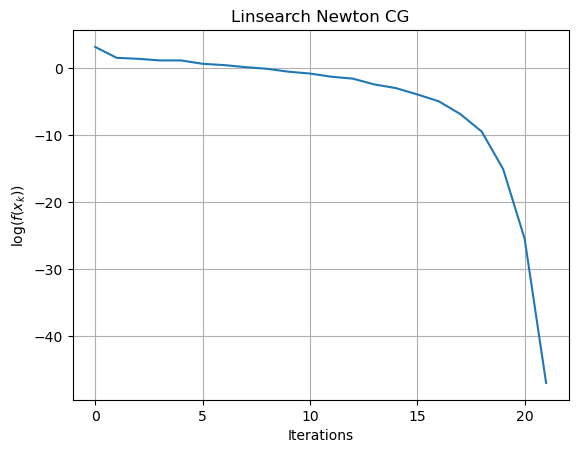

In [114]:
plot_LineSearch_Newton_CG(np.array([-1.2, 1]), eta_k_seq_Super_Linear, f, grad_f, hess_f)

,xk,Negative Curvature Step Taken
0,"[2.8, 4.0]",0
1,"[2.7976592977893366, 7.826892067620289]",False
2,"[2.5731978453451805, 6.570959413629761]",False
3,"[2.4311810459750993, 5.890472507005277]",False
4,"[2.146864217646864, 4.528189910141837]",False
5,"[2.0800587146487115, 4.3221812811552285]",False
6,"[1.9373896956161327, 3.7297771522647354]",False
7,"[1.774090947586759, 3.120732209201305]",False
8,"[1.6518653449144671, 2.713720019780783]",False
9,"[1.4884012437313152, 2.1886177499653137]",False


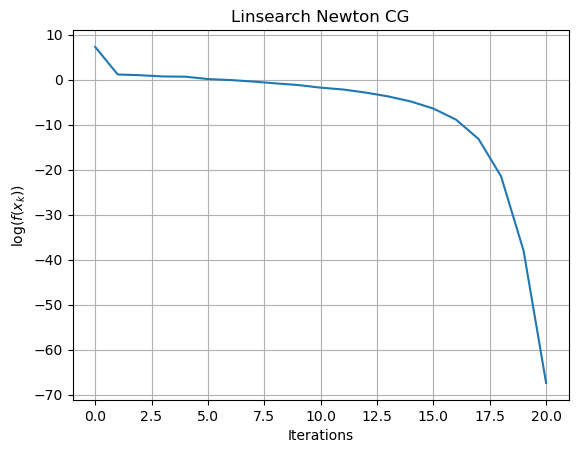

In [115]:
plot_LineSearch_Newton_CG(np.array([2.8, 4]), eta_k_seq_Super_Linear, f, grad_f, hess_f)

,xk,Negative Curvature Step Taken
0,"[-1.2, 1.0]",0
1,"[-1.1752808988764052, 1.3806741573033716]",False
2,"[-0.9329814276198181, 0.8112106557969774]",False
3,"[-0.7825400789708418, 0.5897363758123699]",False
4,"[-0.45999711906986696, 0.10756338857089615]",False
5,"[-0.39304563414146176, 0.15000236918354554]",False
6,"[-0.2094119091018947, 0.0067701267012041655]",False
7,"[-0.06571902139585145, -0.01632865620407311]",False
8,"[0.1420425451703407, -0.022988783903570054]",False
9,"[0.2311071975612045, 0.045478024459088315]",False


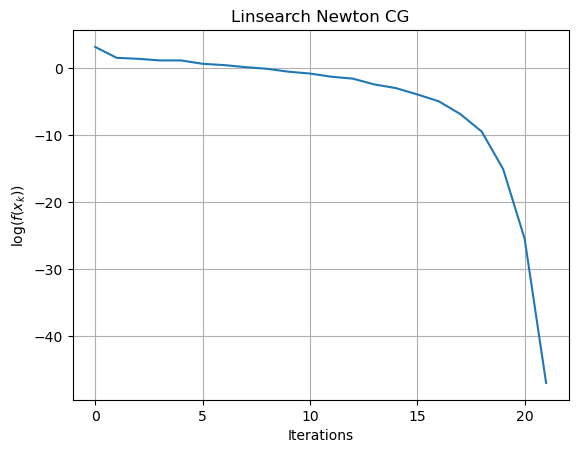

In [116]:
plot_LineSearch_Newton_CG(np.array([-1.2, 1]), eta_k_seq_Quadratic, f, grad_f, hess_f)

,xk,Negative Curvature Step Taken
0,"[2.8, 4.0]",0
1,"[2.7976592977893366, 7.826892067620289]",False
2,"[2.5731978453451805, 6.570959413629761]",False
3,"[2.4311810459750993, 5.890472507005277]",False
4,"[2.146864217646864, 4.528189910141837]",False
5,"[2.0800587146487115, 4.3221812811552285]",False
6,"[1.9373896956161327, 3.7297771522647354]",False
7,"[1.774090947586759, 3.120732209201305]",False
8,"[1.6518653449144671, 2.713720019780783]",False
9,"[1.4884012437313152, 2.1886177499653137]",False


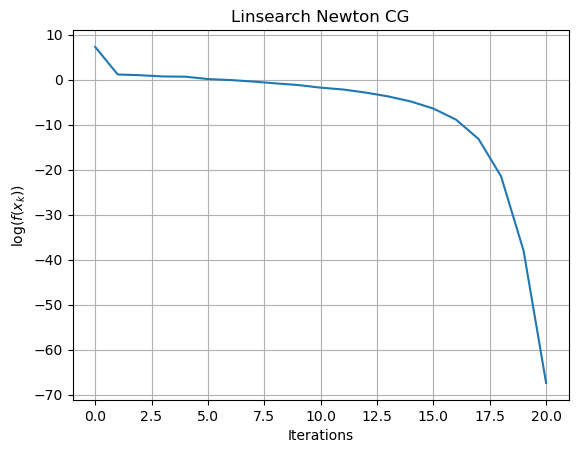

In [117]:
plot_LineSearch_Newton_CG(np.array([2.8, 4]), eta_k_seq_Quadratic, f, grad_f, hess_f)

### Problem 4

Find the Cholesky Factorization of the matrix (show work)

$$
B = \begin{pmatrix}
    1 & 2 & 4 & 7 \\
    2 & 13 & 23 & 38 \\
    4 & 23 & 77 & 122 \\
    7 & 38 & 122 & 194
\end{pmatrix} \\
D = \begin{pmatrix}
    4 & 14 & 16 \\
    14 & 50 & 58 \\
    16 & 58 & 132
\end{pmatrix}
$$


Let the following be true:

$$
\begin{align*}
B &= \begin{pmatrix}
    1 & 2 & 4 & 7 \\
    2 & 13 & 23 & 38 \\
    4 & 23 & 77 & 122 \\
    7 & 38 & 122 & 194
\end{pmatrix} = \begin{pmatrix}
    L_{1,1} & 0 & 0 & 0 \\
    L_{2,1} & L_{2,2} & 0 & 0 \\
    L_{3,1} & L_{3,2} & L_{3,3} & 0 \\
    L_{4,1} & L_{4,2} & L_{4,3} & L_{4,4}
\end{pmatrix}\begin{pmatrix}
    L_{1,1} & L_{2,1} & L_{3,1} & L_{4,1}\\
    0 & L_{2,2} & L_{3,2} & L_{4,2} \\
    0 & 0 & L_{3,3} & L_{4,3} \\
    0 & 0 & 0 & L_{4,4}
\end{pmatrix} \\
&= \begin{pmatrix}
    L_{1,1}^2 & L_{1,1}L_{2,1} & L_{1,1}L_{3,1} & L_{1,1}L_{4,1} \\
    L_{1,1}L_{2,1} & L_{2,1}^2 + L_{2,2}^2 & L_{2,1}L_{3,1} + L_{2,2}L_{3,2} & L_{2,1}L_{4,1} + L_{2,2}L_{4,2} \\
    L_{1,1}L_{3,1} & L_{2,1}L_{3,1} + L_{2,2}L_{3,2} & L_{3,1}^2 + L_{3,2}^2 + L_{3,3}^2 & L_{3,1}L_{4,1} + L_{3,2}L_{4,2} + L_{3,3}L_{4,3} \\
    L_{1,1}L_{4,1} & L_{2,1}L_{4,1} + L_{2,2}L_{4,2} & L_{3,1}L_{4,1} + L_{3,2}L_{4,2} + L_{3,3}L_{4,3} & L_{4,1}^2 + L_{4,2}^2 + L_{4,3}^2 + L_{4,4}^2
\end{pmatrix}
\end{align*}
$$

such that we get:

$$
L_{1,1} = 1 \quad L_{2,1} = 2 \quad L_{3,1} = 4 \quad L_{4,1} = 7 \quad L_{2,2} = 3 \quad L_{3,2} = 5 \quad L_{4,2} = 8 \qquad L_{3,3} = 6 \qquad L_{4,3} = 9 \qquad L_{4,4} = 0 \\
L = \begin{pmatrix}
    1 & 0 & 0 & 0 \\
    2 & 3 & 0 & 0 \\
    4 & 5 & 6 & 0 \\
    7 & 8 & 9 & 0
\end{pmatrix}
$$


In [ ]:
L = np.array([[1, 0, 0, 0], [2, 3, 0, 0], [4, 5, 6, 0], [7, 8, 9, 0]])
print(np.matmul(L, L.T))

Let the following be true:

$$
D = \begin{pmatrix}
    4 & 14 & 16 \\
    14 & 50 & 58 \\
    16 & 58 & 132
\end{pmatrix} = \begin{pmatrix}
    L_{1,1} & 0 & 0 \\
    L_{2,1} & L_{2,2} & 0 \\
    L_{3,1} & L_{3,2} & L_{3,3}
\end{pmatrix}\begin{pmatrix}
    L_{1,1} & L_{2,1} & L_{3,1} \\
    0 & L_{2,2} & L_{3,2} \\
    0 & 0 & L_{3,3}
\end{pmatrix} = \begin{pmatrix}
    L_{1,1}^2 & L_{1,1}L_{2,1} & L_{1,1}L_{3,1} \\
    L_{1,1}L_{2,1} & L_{2,1}^2 + L_{2,2}^2 & L_{2,1}L_{3,1} + L_{2,2}L_{3,2} \\
    L_{1,1}L_{3,1} & L_{2,1}L_{3,1} + L_{2,2}L_{3,2} & L_{3,1}^2 + L_{3,2}^2 + L_{3,3}^2
\end{pmatrix}
$$

such that we get:

$$
L_{1,1} = 2 \quad L_{2,1} = 7 \quad L_{3,1} = 8 \quad L_{2,2} = 1 \quad L_{3,2} = 2 \quad L_{3,3} = 8 \\
L = \begin{pmatrix}
    2 & 0 & 0 \\
    7 & 1 & 0 \\
    8 & 2 & 8
\end{pmatrix}
$$


In [ ]:
L = np.array([[2, 0, 0], [7, 1, 0], [8, 2, 8]])
print(np.matmul(L, L.T))